#  Desafío - Dimensionalidad y Agrupación(I)


- Nombre: Julio Esparza H
- Profesor: Josué Fredes
- Generación: G4
- Grupo: vip


## Desafío 1:
### Lectura de archivos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msgn
import matplotlib.pyplot as plt
import factor_analyzer as fact
import statsmodels.formula.api as smf

df = pd.read_csv('bfi.csv', index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: 
### Preprocesamiento

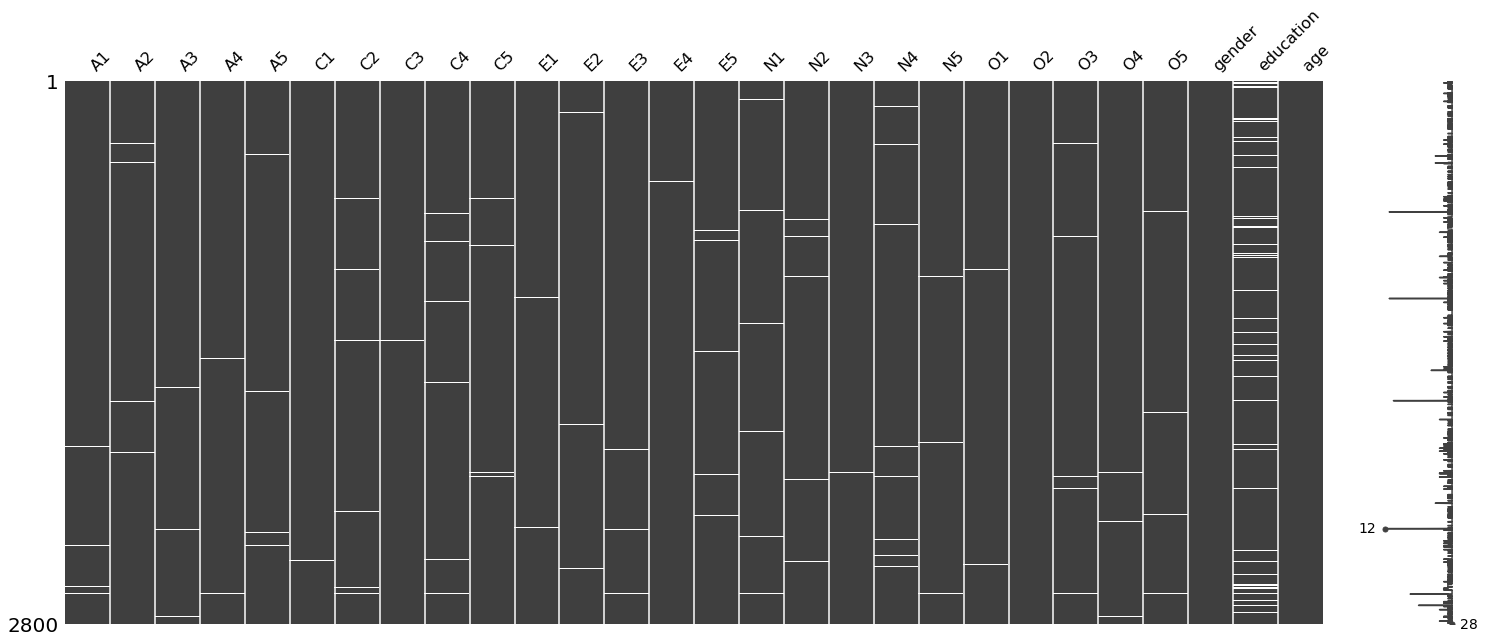

In [2]:
df = df.replace([8,9], [np.nan, np.nan])
msgn.matrix(df)

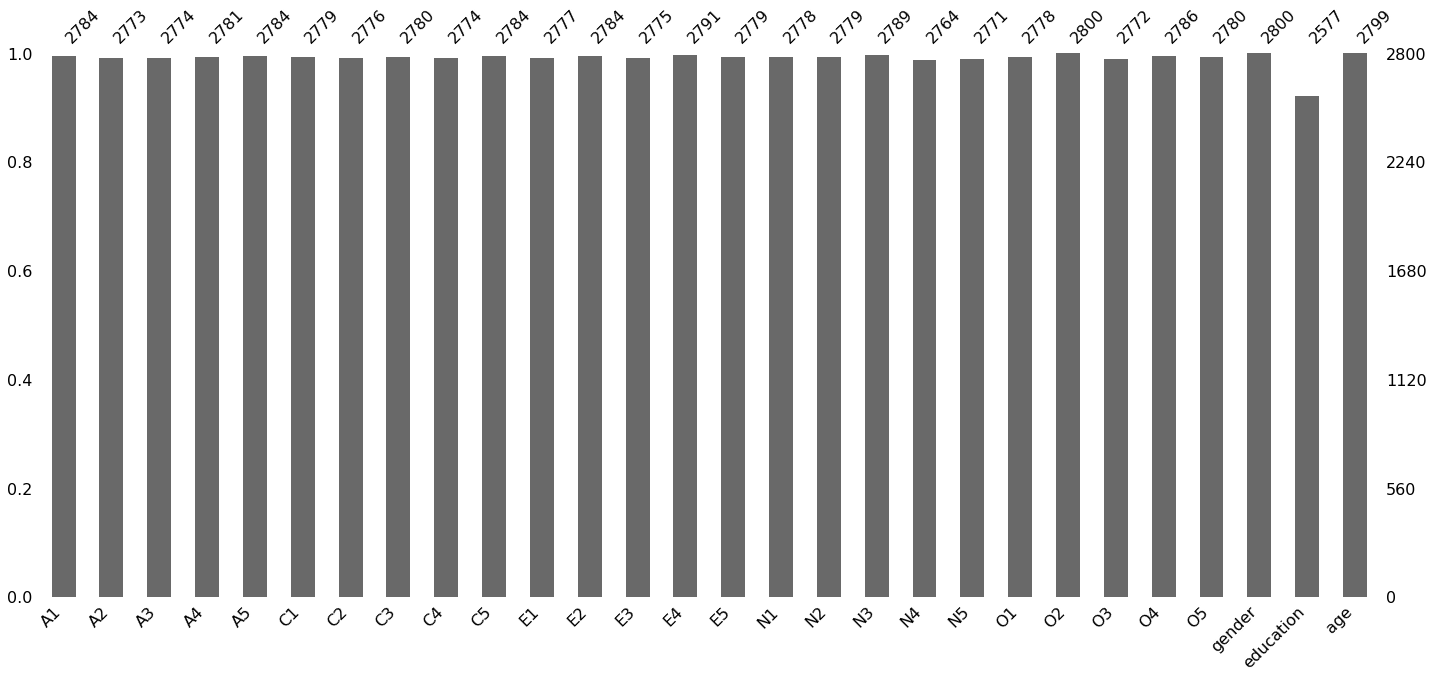

In [3]:
msgn.bar(df)
plt.show()

In [4]:
df = df.dropna()

podemos observar que la variable 'education' es la que más datos perdidos tiene.

## Desafío 3:
### Descripción

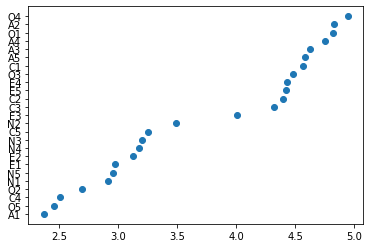

In [5]:
variable = []
mean = []
trust_df=df.drop(columns=['gender', 'age', 'education'])
for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())

mean_df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.plot(mean_df['mean'], mean_df['var'],'o')

Las 3 oraciones con un mayor promedio de representatividad son:
- Dedico tiempo a la reflexión de cosas (O4).
- Me preocupo del bienestar de otros (A2).
- Estoy lleno de ideas (O1).

Las 3 oraciones con un menor promedio de representatividad son:
- Soy indiferente a los sentimientos de otros (A1).
- No profundizaré sobre una materia específica (O5).
- Hago cosas con el mínimo esfuerzo (C4).

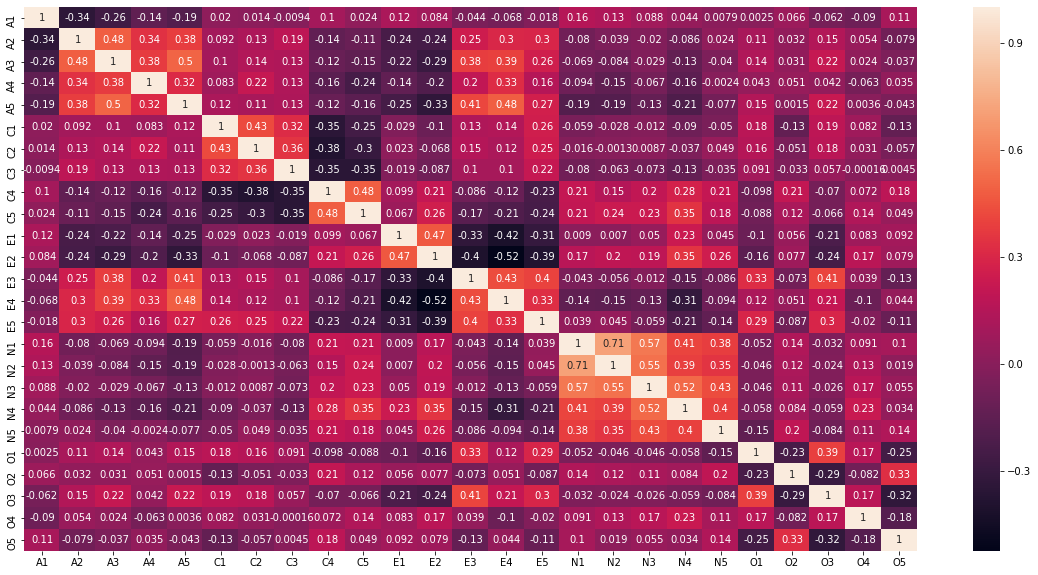

In [6]:
matriz_correlacion = trust_df.corr()
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(matriz_correlacion, annot = True)

Las principales correlaciones encontradas entre las preguntas de la batería son:
- A3 y A5 (0.5)
- E2 y E4 (-0.52)
- N1 y N3 (0.57)
- N1 y N2 (0.71)
- N2 y N3 (0.55)
- N3 y N4 (0.52)

## Desafío 4:
### Extracción de factores

In [7]:
fact.calculate_bartlett_sphericity(trust_df)

(16509.67355049719, 0.0)

La matriz de correlaciones no es igual a la matriz de identidad, es decir, los elementos no se relacionan unicamente con sigo mismo, existiendo covarianzas entre 2 o más ítems de la batería de preguntas

In [8]:
fact.calculate_kmo(trust_df)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833754)

Tanto los valores individuales como el global de KMO son mayores a 0.7, por lo que podemos afirmar que existe por lo menos 1 factor latente importante.

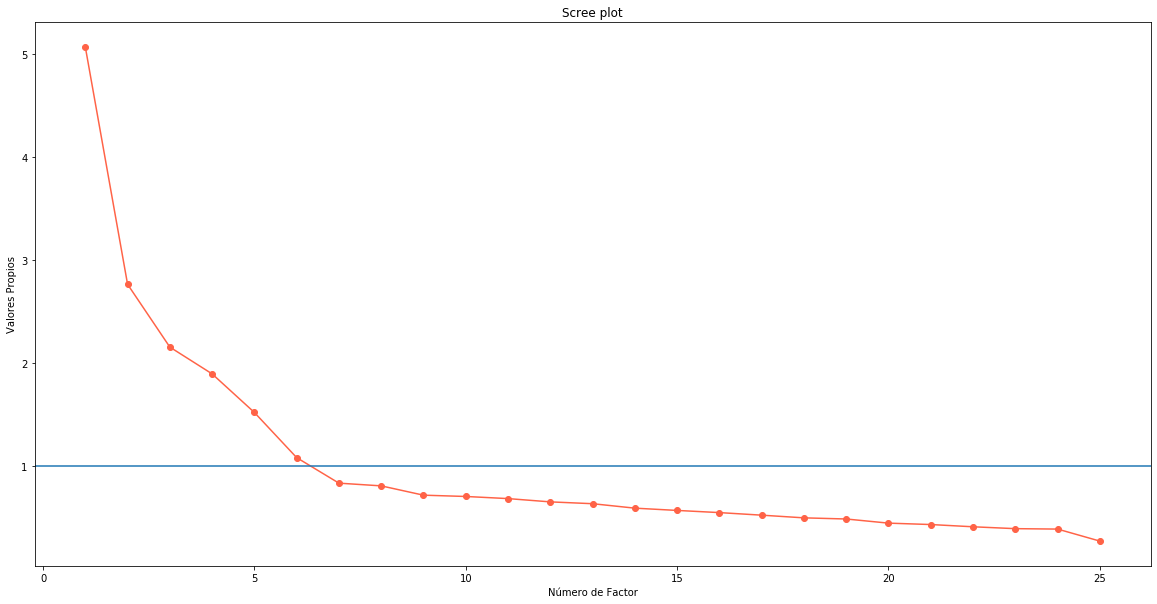

In [9]:
factorize = fact.FactorAnalyzer(n_factors=10, rotation = None,  method='principal')
factorize.fit(trust_df)
factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(np.arange(1,len(factor_screeplot)+1), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

Se debe preservar el número de factores latentes que arroje un eugenvalue > 1. En este caso consideraremos 5 factores y volveremos a realizar el análisis factorial con este valor 'n_factors':

In [10]:
factorize = fact.FactorAnalyzer(n_factors=5, rotation="varimax", method='principal')
factorize.fit(trust_df)
factor_loadings = pd.DataFrame(factorize.loadings_)
factor_loadings.set_index(trust_df.columns, inplace=True)
factor_loadings.columns = ['Factor1', 'Factor2','Factor3', 'Factor4','Factor5']
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.142965,0.134448,0.084789,-0.636889,-0.142820
A2,0.041422,0.229283,0.128874,0.702928,0.039994
A3,0.013275,0.356260,0.102181,0.676438,0.031410
A4,-0.061869,0.204481,0.248831,0.527787,-0.191442
A5,-0.126004,0.430824,0.073130,0.565769,0.035915
C1,0.040220,0.065878,0.650391,0.007846,0.220366
C2,0.115687,0.024791,0.732348,0.106665,0.088365
C3,-0.023287,0.014438,0.679629,0.114752,-0.036438
C4,0.269799,-0.051565,-0.686386,-0.038251,-0.103104
C5,0.314086,-0.176965,-0.626064,-0.027789,0.067510


In [11]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,,,,,
A2,,,,0.7,
A3,,,,0.68,
A4,,,,0.53,
A5,,0.43,,0.57,
C1,,,0.65,,
C2,,,0.73,,
C3,,,0.68,,
C4,,,,,
C5,,,,,


Respecto a los factores latentes obtenidos y su relación con las preguntas de la batería:
- El factor 1 está relacionado con las preguntas N1 a la N5, que tienen relación con el neuroticismo.
- El factor 2 está relacionado con las preguntas A5 y E3 a la E5, que tienen relación con la amabilidad y la extroversión.
- El factor 3 está relacionado con las preguntas C1 a la C3, que tienen relación con la Escrupolisidad.
- El factor 4 está relacionado con las preguntas A2 a la A5, que tienen relación con la amabilidad.
- El factor 5 está relacionado con las preguntas O1, O3 y O4, que tienen relación con la apertura.

## Desafío 5:
###  Modelación de factores

In [12]:
extract_factor_scores = factorize.transform(trust_df)
extract_factor_scores


array([[ 0.43467765,  1.29797687,  1.5650514 , -0.49747486,  0.13886517],
       [ 0.26661595, -1.48083624, -0.8207628 , -1.86162167, -0.45058981],
       [-0.11242532,  0.40077622, -0.2060219 , -0.24857917, -0.3872679 ],
       ...,
       [-0.30010834,  0.9608532 ,  0.80543471, -1.47920323,  0.86019039],
       [ 0.92947858,  0.85733948,  0.12498799, -2.60250608,  0.76812462],
       [-1.87440598, -1.76657   , -0.17581761, -1.74135946,  0.0829518 ]])

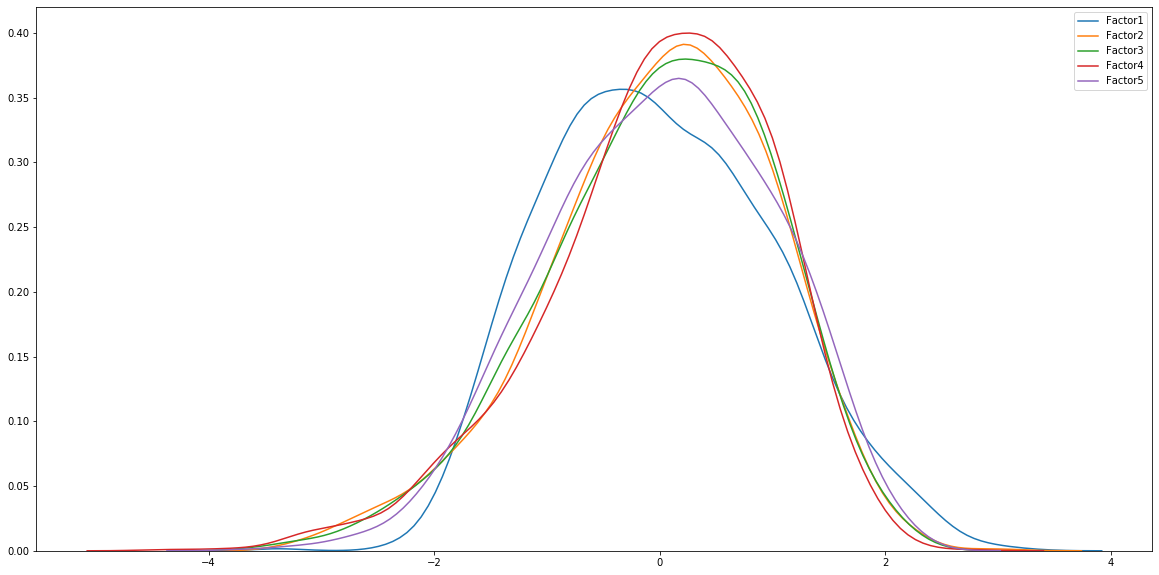

In [13]:
df_modelo = pd.DataFrame(extract_factor_scores)
df_modelo.columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5']

gender = df['gender']
age = df['age']
education = df['education']

df_modelo['gender'] = gender.values
df_modelo['age'] = age.values
df_modelo['education'] = education.values

df_modelo['binary_gender'] = np.where(df_modelo['gender'] == 2 , 1, 0)
df_modelo["binary_education_1"] = np.where(df["education"] == 1, 1, 0)
df_modelo["binary_education_2"] = np.where(df["education"] == 2, 1, 0)
df_modelo["binary_education_3"] = np.where(df["education"] == 3, 1, 0)
df_modelo["binary_education_4"] = np.where(df["education"] == 4, 1, 0)
df_modelo["binary_education_5"] = np.where(df["education"] == 5, 1, 0)

   
sns.kdeplot(df_modelo['Factor1'])
sns.kdeplot(df_modelo['Factor2'])
sns.kdeplot(df_modelo['Factor3'])
sns.kdeplot(df_modelo['Factor4'])
sns.kdeplot(df_modelo['Factor5'])

In [14]:
print (df_modelo['binary_gender'].value_counts())
print (df_modelo['binary_education_1'].value_counts())
print (df_modelo['binary_education_2'].value_counts())
print (df_modelo['binary_education_3'].value_counts())
print (df_modelo['binary_education_4'].value_counts())
print (df_modelo['binary_education_5'].value_counts())

1    1501
0     735
Name: binary_gender, dtype: int64
0    2038
1     198
Name: binary_education_1, dtype: int64
0    1986
1     250
Name: binary_education_2, dtype: int64
0    1158
1    1078
Name: binary_education_3, dtype: int64
0    1890
1     346
Name: binary_education_4, dtype: int64
0    1872
1     364
Name: binary_education_5, dtype: int64


In [15]:
model_f1 = smf.ols("Factor1 ~ binary_gender + education + age", df_modelo).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor1   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.57
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.60e-12
Time:                        19:26:04   Log-Likelihood:                -3143.7
No. Observations:                2236   AIC:                             6295.
Df Residuals:                    2232   BIC:                             6318.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1629      0.082      1.983      0.047       0.002       0.324
binary_gender     0.2534      0.045      5.691      0.000       0.166       0.341
education        -0.0092      0.019     -0.474      0.636      -0.047       0.029
age              -0.0103      0.002     -5.080      0.000      -0.014      -0.006
==============================================================================
Omnibus:                       46.276   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.046
Skew:                           0.266   Prob(JB):                     2.01e-09
Kurtosis:                       2.618   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model_f1 = smf.ols("Factor2 ~ binary_gender + education + age", df_modelo).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor2   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.121
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           0.000383
Time:                        19:26:04   Log-Likelihood:                -3163.6
No. Observations:                2236   AIC:                             6335.
Df Residuals:                    2232   BIC:                             6358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0280      0.083     -0.338      0.735      -0.191       0.135
binary_gender     0.1747      0.045      3.888      0.000       0.087       0.263
education        -0.0347      0.020     -1.774      0.076      -0.073       0.004
age               0.0007      0.002      0.359      0.719      -0.003       0.005
==============================================================================
Omnibus:                       60.649   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.149
Skew:                          -0.418   Prob(JB):                     7.13e-15
Kurtosis:                       3.033   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_f1 = smf.ols("Factor3 ~ binary_gender + education + age", df_modelo).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.098
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           9.58e-05
Time:                        19:26:04   Log-Likelihood:                -3162.1
No. Observations:                2236   AIC:                             6332.
Df Residuals:                    2232   BIC:                             6355.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2689      0.083     -3.246      0.001      -0.431      -0.106
binary_gender     0.1444      0.045      3.216      0.001       0.056       0.232
education        -0.0048      0.020     -0.243      0.808      -0.043       0.034
age               0.0063      0.002      3.105      0.002       0.002       0.010
==============================================================================
Omnibus:                       71.713   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.172
Skew:                          -0.458   Prob(JB):                     1.06e-17
Kurtosis:                       3.027   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model_f1 = smf.ols("Factor4 ~ binary_gender + education + age", df_modelo).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor4   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     45.51
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.54e-28
Time:                        19:26:05   Log-Likelihood:                -3106.4
No. Observations:                2236   AIC:                             6221.
Df Residuals:                    2232   BIC:                             6244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6338      0.081     -7.844      0.000      -0.792      -0.475
binary_gender     0.4561      0.044     10.416      0.000       0.370       0.542
education         0.0263      0.019      1.379      0.168      -0.011       0.064
age               0.0083      0.002      4.144      0.000       0.004       0.012
==============================================================================
Omnibus:                      143.677   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.107
Skew:                          -0.623   Prob(JB):                     9.46e-39
Kurtosis:                       3.571   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model_f1 = smf.ols("Factor5 ~ binary_gender + education + age", df_modelo).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor5   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     25.49
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.27e-16
Time:                        19:26:05   Log-Likelihood:                -3135.1
No. Observations:                2236   AIC:                             6278.
Df Residuals:                    2232   BIC:                             6301.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2713      0.082     -3.315      0.001      -0.432      -0.111
binary_gender    -0.2653      0.044     -5.981      0.000      -0.352      -0.178
education         0.1087      0.019      5.623      0.000       0.071       0.147
age               0.0035      0.002      1.719      0.086      -0.000       0.007
==============================================================================
Omnibus:                       37.045   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.681
Skew:                          -0.240   Prob(JB):                     8.01e-08
Kurtosis:                       2.654   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
De los modelos obtenidos para cada factor, se puede observar:
- Para el Factor1 el principal determinante es el género y luego la edad. Se decarta educación por su significancia.
- Para el Factor2 el principal determinante es el género. Se decarta edad y educación por su significancia.
- Para el Factor3 el principal determinante es el género y luego la edad. Se decarta educación por su significancia.
- Para el Factor4 el principal determinante es el género y luego la edad. Se decarta educación por su significancia.
- Para el Factor5 el principal determinante es el género y luego la edad. Se decarta edad por su significancia.

SyntaxError: invalid syntax (<ipython-input-20-83d8b51b2633>, line 1)